## 1. Introduction: Give the details on the source of your data, its content, and some questions you are interested in. The data should have at least 1000 rows and 4 columns.

#### We have selected the dataset that cotains Corona Virus cases between January 2020 and June 2020 from Kaggle. 
#### It contains 4389 rows and 6 columns. 
#### The group 2 will present Corona Virus tracking the number of confirmed cases, Death toll and Recovered patients in USA. 


#### Source: https://www.kaggle.com/code/khoongweihao/covid-19-novel-coronavirus-eda-forecasting-cases/notebook



In [ ]:
# Libraries
import numpy as np
import pandas as pd

#### I have introduced two different methods to import a dataset. 
##### Method 1: Downloading a dataset  in the notebook document on Google Colab.

In [ ]:
# Upload your dataset to Google Colab Notebook and import 
df = pd.read_csv( r'/content/forecasts_custom_prophet.csv')

##### Method 2: Mounting Drive to import a dataset.

In [ ]:
# run this  code when you saved your dataset in google drive.
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# get the numbers of rows and columns.
print("dimensions of the group2 dataframe = ",df.shape)

dimensions of the group2 dataframe =  (4389, 5)


In [ ]:
# Read data on forecats_custom_prophet
users = pd.read_table('/content/forecasts_custom_prophet.csv')

In [ ]:
print(users)

     ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0     2020-06-04 00:00:00,New South Wales,Australia,...                      
1     2020-06-05 00:00:00,New South Wales,Australia,...                      
2     2020-06-06 00:00:00,New South Wales,Australia,...                      
3     2020-06-07 00:00:00,New South Wales,Australia,...                      
4     2020-06-08 00:00:00,New South Wales,Australia,...                      
...                                                 ...                      
4384                                  0,0,0,0.0,0.0,0.0                      
4385                                  0,0,0,0.0,0.0,0.0                      
4386                                  0,0,0,0.0,0.0,0.0                      
4387                                  0,0,0,0.0,0.0,0.0                      
4388                                  0,0,0,0.0,0.0,0.0                      

[4389 rows x 1 columns]


## 2. Prepare and wrangle your data with Pandas and Numpy.

In [ ]:
# list data types of the dataframe.
df.dtypes

Province/State    object
Country/Region    object
Confirmed          int64
Deaths             int64
Recovered          int64
dtype: object

In [ ]:
# Print the dataset.
df.head()

,Province/State,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,,
2020-06-04 00:00:00,New South Wales,Australia,4019,51,3321
2020-06-05 00:00:00,New South Wales,Australia,4082,51,3465
2020-06-06 00:00:00,New South Wales,Australia,4075,52,3494
2020-06-07 00:00:00,New South Wales,Australia,4085,53,3493
2020-06-08 00:00:00,New South Wales,Australia,4121,53,3480


In [ ]:
# Check how many null values in the dataset and output.
print('Number of null/NaN values in df: ',df.isnull().values.sum())

Number of null/NaN values in df:  0


In [ ]:
# In Region, there is 0 values.

df['Country/Region'].unique()

array(['Australia', '0', 'Brazil', 'Canada', 'Chile', 'Colombia',
       'Denmark', 'France', 'Germany', 'Hong Kong', 'Italy', 'Japan',
       'Macau', 'Mainland China', 'Mexico', 'Netherlands', 'Peru',
       'Russia', 'Spain', 'UK', 'US', 'Ukraine'], dtype=object)

In [ ]:
# remove decimals in Confirmed, Deaths and Recovered variables.
df.Confirmed = df.Confirmed.apply(int)
df.Deaths = df.Deaths.apply(int)
df.Recovered = df.Recovered.apply(int)
print(df)

                      Province/State Country/Region  Confirmed  Deaths  \
ObservationDate                                                          
2020-06-04 00:00:00  New South Wales      Australia       4019      51   
2020-06-05 00:00:00  New South Wales      Australia       4082      51   
2020-06-06 00:00:00  New South Wales      Australia       4075      52   
2020-06-07 00:00:00  New South Wales      Australia       4085      53   
2020-06-08 00:00:00  New South Wales      Australia       4121      53   
...                              ...            ...        ...     ...   
0                                  0              0          0       0   
0                                  0              0          0       0   
0                                  0              0          0       0   
0                                  0              0          0       0   
0                                  0              0          0       0   

                     Recovered  
Obse

In [ ]:
# Remove the count column from the dataframe
df = df.set_index('ObservationDate')
print(df)

                      Province/State Country/Region  Confirmed  Deaths  \
ObservationDate                                                          
2020-06-04 00:00:00  New South Wales      Australia     4019.0    51.0   
2020-06-05 00:00:00  New South Wales      Australia     4082.0    51.0   
2020-06-06 00:00:00  New South Wales      Australia     4075.0    52.0   
2020-06-07 00:00:00  New South Wales      Australia     4085.0    53.0   
2020-06-08 00:00:00  New South Wales      Australia     4121.0    53.0   
...                              ...            ...        ...     ...   
0                                  0              0        0.0     0.0   
0                                  0              0        0.0     0.0   
0                                  0              0        0.0     0.0   
0                                  0              0        0.0     0.0   
0                                  0              0        0.0     0.0   

                     Recovered  
Obse

In [ ]:
df= df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'})

In [ ]:
# drop rows by condition. 0 values are removed.
df=df[df.Country !='0']

In [ ]:
print("number of rows and colummns in our df after drop 0 = ", df.shape)

number of rows and colummns in our df after drop 0 =  (2364, 5)


In [ ]:
df.describe(include='all')

,State,Country,Confirmed,Deaths,Recovered
count,2364,2364,2.364000e+03,2364.000000,2.364000e+03
unique,532,21,NaN,NaN,NaN
top,Unknown,US,NaN,NaN,NaN
freq,23,1019,NaN,NaN,NaN
mean,NaN,NaN,2.363147e+04,1209.284687,2.546793e+04
std,NaN,NaN,1.368274e+05,10152.904756,2.224601e+05
min,NaN,NaN,0.000000e+00,0.000000,0.000000e+00
25%,NaN,NaN,6.000000e+00,0.000000,0.000000e+00
50%,NaN,NaN,1.940000e+02,3.000000,0.000000e+00
75%,NaN,NaN,7.986750e+03,143.250000,4.400000e+02


In [ ]:
df.describe()

,Confirmed,Deaths,Recovered
count,2.364000e+03,2364.000000,2.364000e+03
mean,2.363147e+04,1209.284687,2.546793e+04
std,1.368274e+05,10152.904756,2.224601e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,6.000000e+00,0.000000,0.000000e+00
50%,1.940000e+02,3.000000,0.000000e+00
75%,7.986750e+03,143.250000,4.400000e+02
max,3.242818e+06,382980.000000,4.657437e+06


In [ ]:
df.Country.value_counts() #show the amount of rows for each country

US                1019
Mainland China     217
Japan              183
Canada             126
Russia             110
UK                  85
Colombia            70
Peru                70
Australia           69
France              67
Brazil              58
Ukraine             50
Mexico              46
Spain               41
Chile               39
Italy               32
Netherlands         29
Germany             24
Denmark             15
Macau                7
Hong Kong            7
Name: Country, dtype: int64

In [ ]:
# displayiny the variable of the dataset
df.dtypes

State        object
Country      object
Confirmed     int64
Deaths        int64
Recovered     int64
dtype: object

In [ ]:
df_2=pd.get_dummies(df_1)
df_2.head()

,Confirmed,Deaths,Recovered,ObservationDate_0,ObservationDate_2020-02-02 00:00:00,ObservationDate_2020-02-05 00:00:00,ObservationDate_2020-02-06 00:00:00,ObservationDate_2020-03-04 00:00:00,ObservationDate_2020-03-05 00:00:00,ObservationDate_2020-03-06 00:00:00,...,Country/Region_Macau,Country/Region_Mainland China,Country/Region_Mexico,Country/Region_Netherlands,Country/Region_Peru,Country/Region_Russia,Country/Region_Spain,Country/Region_UK,Country/Region_US,Country/Region_Ukraine
0,4019.0,51.0,3321.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4082.0,51.0,3465.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4075.0,52.0,3494.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4085.0,53.0,3493.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4121.0,53.0,3480.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Use EDA principles and the Matplotlib/Seaborn packages to visualize the data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

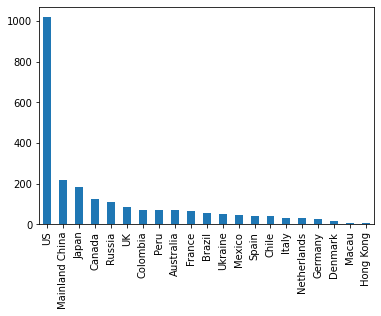

In [ ]:
# plot a bar chart showing the number rows for each country.
df.Country.value_counts().plot(kind='bar')

## 4. Use at least two of the following depending on your question of interest: pairplot, histogram, barplot, boxplot, or scatterplot.

In [ ]:
# Plot the data using bar()
plt.bar(X, Y, color='g')
plt.xlabel("Countries")
plt.ylabel("confirmed Cases")

#show plot
plt.show()

NameError: ignored

In [ ]:
world = df.groupby("Country/Region")['Confirmed','Province/State','Recovered','Deaths'].sum().reset_index()
world

KeyError: ignored

In [ ]:
US = world.loc[20]
US

NameError: ignored

## 5. Simulate a nonparametric inference of the Median for a quantitative variable in the dataset.

In [ ]:
from scipy.stats import bootstrap
import numpy as np

In [ ]:

#convert array to sequence
data = (data,)

#calculate 95% bootstrapped confidence interval for median
bootstrap_ci = bootstrap(data, np.median, confidence_level=0.95,
                         random_state=1, method='percentile')

#view 95% boostrapped confidence interval
print(bootstrap_ci.confidence_interval)


NameError: ignored

## 6. The sample size should be about 10% of the data. Use random sampling for the rows.

In [ ]:
subset = df.sample(frac=0.1) #created subset of data using 10% sample size of data
print(subset)

          ObservationDate      Province/State Country/Region  Confirmed  \
402   2020-06-07 00:00:00               Yukon         Canada       11.0   
1128                    0                   0              0        0.0   
3674  2020-03-16 00:00:00  Johnson County, KS             US        1.0   
2500                    0                   0              0        0.0   
2533                    0                   0              0        0.0   
...                   ...                 ...            ...        ...   
2705                    0                   0              0        0.0   
1221  2020-06-07 00:00:00               Hyogo          Japan      699.0   
40    2020-06-09 00:00:00   Western Australia      Australia      588.0   
2656  2020-06-07 00:00:00     Udmurt Republic         Russia     7611.0   
1336  2020-06-10 00:00:00                Oita          Japan       60.0   

      Deaths  Recovered  
402      0.0        9.0  
1128     0.0        0.0  
3674     0.0        0

In [ ]:
subset.Country.value_counts() #value counts for each country

AttributeError: ignored

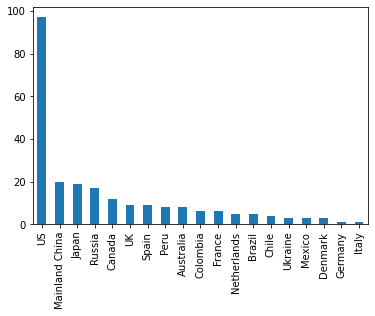

In [ ]:
subset.Country.value_counts().plot(kind='bar') #plotted subset of confirmed cases

## 7. Submit a link to the GitHub RUR.

## 8. Present in the class